# Homework 03
Please complete the cells marked with "TODO" from T1 to T9.

## Vaccinations Across The Nation

A vaccination clinic has two types of vaccines against a disease. Each person who comes in to be vaccinated gets either Vaccine 1 or Vaccine 2. One week, everyone who came in on Monday, Wednesday, and Friday was given Vaccine 1. Everyone who came in on Tuesday and Thursday was given Vaccine 2. The clinic is closed on weekends.

Doctor DeNero at the clinic said, "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

But Doctor Sahai said, "No, it's not. We're not doing anything like tossing a coin."

That week, the clinic gave Vaccine 1 to 211 people and Vaccine 2 to 107 people. Conduct a test of hypotheses to see which doctor's position is better supported by the data.

In [ ]:
# Do not modify this cell
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## T1
Given the information above, what was the sample size for the data, and what was the percentage of people who got **Vaccine 1?**

*Note*: Your percent should be a number between 0 and 100.

In [ ]:
sample_size = 211+107 # TODO
percent_V1 = (211 / sample_size) * 100 # TODO

print(f"Sample Size: {sample_size}")
print(f"Vaccine 1 Percent: {percent_V1}")

Sample Size: 318
Vaccine 1 Percent: 66.35220125786164


## T2
State the null hypothesis. It should reflect the position of either Dr. DeNero or Dr. Sahai. 
Note: Check out 11.3 for a refresher on hypotheses.


\< Null hypothesis - Dr.DeNero's position \><br>
people get vaccine 1 or 2 at chance. <br>
It's like tossing a coin that lands heads with chance $\frac{3}{5}$. <br>
Heads you get Vaccine 1 and Tails you get Vaccine 2.


## T3
State the alternative hypothesis. It should reflect the position of the doctor you did not choose to represent in the question above.

\< Alternative hypothesis - Dr.Sahai's position \> <br>
No. Randomness is not the only reason to get which vaccine.

## T4
One of the test statistics below is appropriate for testing these hypotheses. Assign the variable `valid_test_stat` to the number corresponding to the correct test statistic.

1. percent of heads - 60
2. percent of heads - 50
3. |percent of heads - 60|
4. |percent of heads - 50|

In [ ]:
valid_test_stat = 3 # TODO
valid_test_stat

3

##T5
Using your answer from Questions T1 and T4, find the observed value of the test statistic and assign it to the variable `observed_statistic`.

In [ ]:
observed_statistic = abs(percent_V1 - 60) # TODO
observed_statistic

6.352201257861637

##T6
In order to perform this hypothesis test, you must simulate the test statistic. From the four options below, pick the assumption that is needed for this simulation. Assign `assumption_needed` to an integer corresponding to the assumption.

1. The statistic must be simulated under the null hypothesis.
2. The statistic must be simulated under the alternative hypothesis.
3. The statistic must be simulated under both hypotheses.
4. No assumptions are needed. We can just simulate the statistic.

In [ ]:
assumption_needed = 1 # TODO
assumption_needed

1

##T7
Simulate 20,000 values of the test statistic under the assumption you picked in T6.  

As usual, start by defining a function that simulates one value of the statistic. Your function should use `sample_proportions`. (You may find a variable defined in T1 useful here!) Then, write a `for` loop to simulate multiple values and collect them in the array `simulated_statistics`.

Use as many lines of code as you need.

In [ ]:
#TODO: complete code in this cell
def sample_proportions(sample_size, probabilities):
	return np.random.multinomial(sample_size, probabilities)/sample_size

def one_simulated_statistic():
  coin_distribution = [0.6, 0.4]
  new_sample = sample_proportions(sample_size, coin_distribution)
  return new_sample

num_simulations = 20000

simulated_statistics = np.array([])
for i in np.arange(num_simulations):
  simulated_statistics = np.append(simulated_statistics, one_simulated_statistic()[0])

simulated_statistics = pd.DataFrame({'Percent of Head' : simulated_statistics})
simulated_statistics['Test Statistics'] = abs(100*simulated_statistics['Percent of Head'] - 60)
# Run the this cell a few times to see how the simulated statistic changes
one_simulated_statistic()
# print(simulated_statistics)

array([0.60691824, 0.39308176])

In [ ]:
simulated_statistics

,Percent of Head,Test Statistics
0,0.638365,3.836478
1,0.603774,0.377358
2,0.600629,0.062893
3,0.569182,3.081761
4,0.569182,3.081761
...,...,...
19995,0.578616,2.138365
19996,0.613208,1.320755
19997,0.600629,0.062893
19998,0.594340,0.566038


##T8
Using `simulated_statistics`, `observed_statistic`, and `num_simulations`, find the empirical p-value based on the simulation.

In [ ]:
p_value = len(simulated_statistics[simulated_statistics['Test Statistics'] > observed_statistic]) / num_simulations #TODO
p_value

0.0205

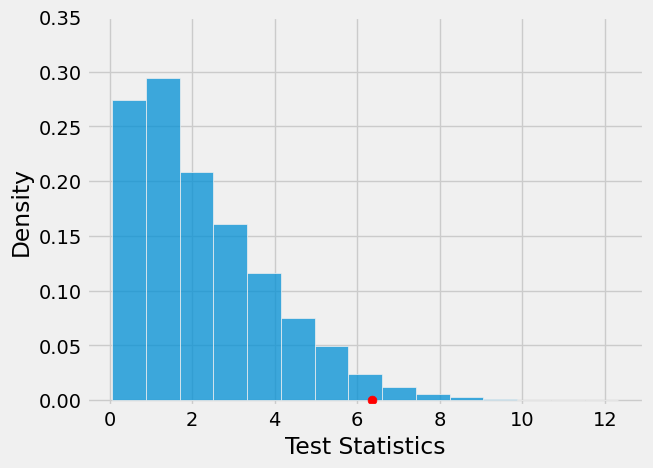

In [ ]:
import seaborn as sns
fig, ax = plots.subplots()

ax = sns.histplot(data=simulated_statistics, x="Test Statistics", bins=15, stat='density')
ax.set_ylim(-0.005, 0.35)
ax.scatter(observed_statistic, 0, color='red', s=40)
plots.show()

##T9
Assign `correct_doctor` to the number corresponding to the correct statement below. Use the 5% cutoff for the p-value. 

1. The data support Dr. DeNero's position more than they support Dr. Sahai's.
2. The data support Dr. Sahai's position more than they support Dr. DeNero's.

As a reminder, here are the two claims made by Dr. DeNero and Dr. Sahai:
> **Doctor DeNero:** "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

>**Doctor Sahai:** "No, it's not. We're not doing anything like tossing a coin."

In [ ]:
correct_doctor = 2 #TODO
correct_doctor